# Create probes

activate npx...

In [2]:
# listen to changes
%load_ext autoreload
%autoreload 2

import os
from collections import Counter
import spikeinterface as si
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np 
from collections import Counter

# set project path
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/spikebias/"

os.chdir(PROJ_PATH)

from src.nodes.dataeng.silico.filtering import filter_microcircuit_cells
from src.nodes.load import load_campaign_params
from src.nodes.study.layer import getAtlasInfo

# SETUP PARAMETERS
from src.nodes.utils import get_config
data_conf_p1, param_conf_p1 = get_config( "silico_horvath", "concatenated/probe_1" ).values()
WIRED_PATH_P1 = data_conf_p1["probe_wiring"]["output"]

data_conf_p2, param_conf_p2 = get_config( "silico_horvath", "concatenated/probe_2" ).values()
WIRED_PATH_P2 = data_conf_p2["probe_wiring"]["output"]

data_conf_p3, param_conf_p3 = get_config( "silico_horvath", "concatenated/probe_3" ).values()
WIRED_PATH_P3 = data_conf_p3["probe_wiring"]["output"]

# SETUP PROBE PARAMETERS
N_COLS = 4
N_CONTACT_PER_COL = 32
X_PITCH = 22.5
Y_PITCH = 22.5
STAGGER = 0
SHAPE = "square"
WIDTH = 20

2024-03-14 18:12:34,926 - root - utils.py - get_config - INFO - Reading experiment config.


/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/nptyping/typing_.py:51: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  Bool8 = np.bool8
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/nptyping/typing_.py:54: DeprecationWarning: `np.object0` is a deprecated alias for ``np.object0` is a deprecated alias for `np.object_`. `object` can be used instead.  (Deprecated NumPy 1.24)`.  (Deprecated NumPy 1.24)
  Object0 = np.object0
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/nptyping/typing_.py:66: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  Int0 = np.int0
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-p

2024-03-14 18:12:34,948 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-03-14 18:12:34,949 - root - utils.py - get_config - INFO - Reading experiment config.
2024-03-14 18:12:34,964 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-03-14 18:12:34,965 - root - utils.py - get_config - INFO - Reading experiment config.
2024-03-14 18:12:34,979 - root - utils.py - get_config - INFO - Reading experiment config. - done


### Describe probe geometry

In [10]:
# calculate other geometrical features
# 4 rows separated by 16 microns
shank_width = (4 - 1) * X_PITCH
print("probe shank width (center to center):", shank_width, "microns")

# calculate measures on illustrator figures
# 12.46 mm <-> 460 microns wide cortical column
print("shank width (center to center):", shank_width * 12.46 / 460, "mm")
print("electrode size:", WIDTH * 12.46 / 460, "mm")
print("x-pitch and y-pitch:", X_PITCH * 12.46 / 460, "mm")

probe shank width (center to center): 67.5 microns
shank width (center to center): 1.8283695652173915 mm
electrode size: 0.5417391304347826 mm
x-pitch and y-pitch: 0.6094565217391305 mm


In [5]:
# geometry figure panel (3 times magnification).
1.8 * 3
0.6 * 3
0.54 * 3

1.62

### Create probe

### Probe 1

channel ids:
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127]
contact ids:
 ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43'
 '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57'
 '58' '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71'
 '72' '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85'
 '86' '87' '88' '89' '90'

/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/indexes/multi.py:643: DeprecationWarning: `cumproduct` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `cumprod` instead.
  codes = cartesian_product(codes)
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [


Counter({'L2/3': 64, 'L1': 37, 'Outside': 27})

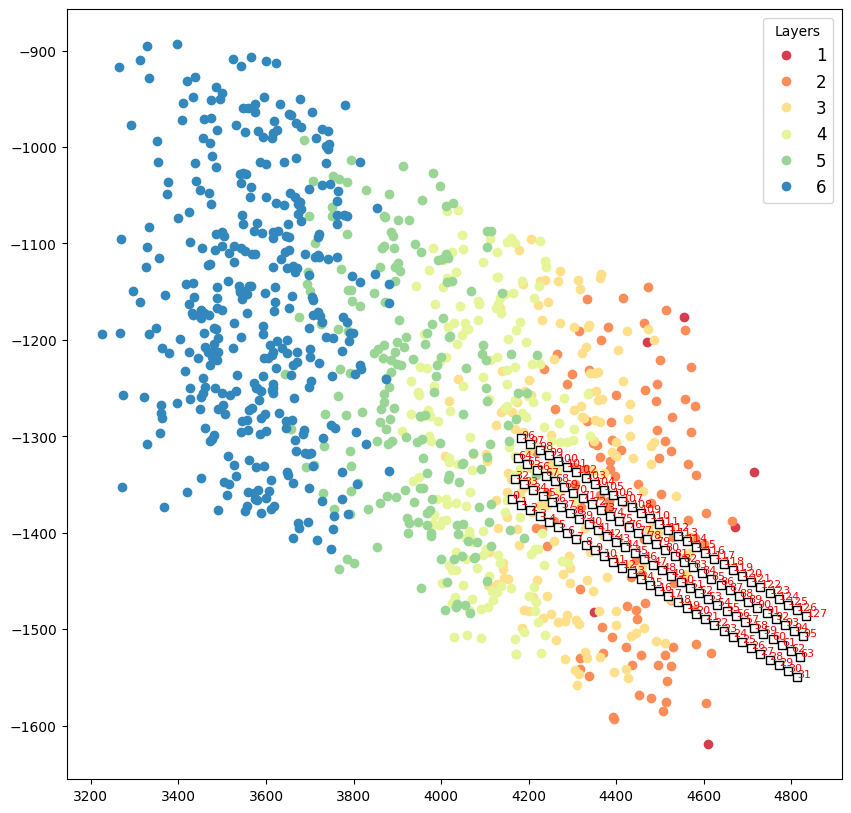

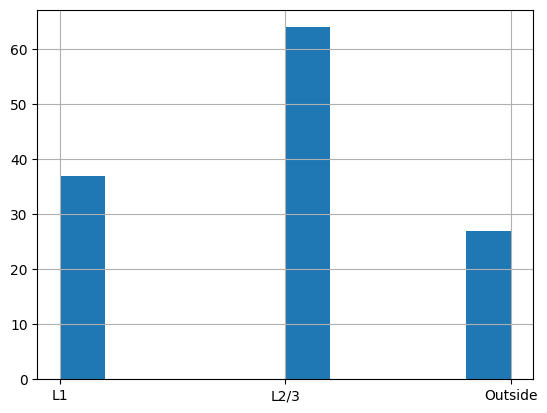

In [30]:
# GET SITES IN CORTEX ---------

Recording_p1 = si.load_extractor(WIRED_PATH_P1)
Recording_p1.get_property("layers")

# 40 secs
# wire recording with probe
print("channel ids:\n", Recording_p1.get_channel_ids())

# contact ids are empty. In Kilosort3 they are ordered with the coordinates rows and assigned labels 1:384
# get contact coordinates
Probe1 = Recording_p1.get_probe()
print("contact ids:\n", Probe1.contact_ids)

# print contacts in cortex
print("\nSites in cortex:")
Probe1.contact_ids[Recording_p1.get_property("layers") != "Outside"]

# PLOT ----

# get the campaign parameters from the first simulation
simulation = load_campaign_params(data_conf_p1)

# get column circuit soma coord.
microcircuit = filter_microcircuit_cells(simulation)

microcircuit_coord = microcircuit["soma_location"].sample(
    n=1000, axis=0, random_state=1
)

# get cell layers
cell_layers = simulation["circuit"].cells.get(
    group=microcircuit["gid"], properties="layer"
)

# plot cells colored by layer
layer_color = [
    (0, 0, 0),
    (213 / 255, 62 / 255, 79 / 255),
    (252 / 255, 141 / 255, 89 / 255),
    (254 / 255, 224 / 255, 139 / 255),
    (230 / 255, 245 / 255, 152 / 255),
    (153 / 255, 213 / 255, 148 / 255),
    (50 / 255, 136 / 255, 189 / 255),
]

layers = np.sort(cell_layers.unique())

fig, ax = plt.subplots(figsize=(10, 10))

# setup plot
# ax = fig.add_subplot(111, projection="3d")
# ax.view_init(90, 0, 0)

for layer_i in layers:
    ax.plot(
        microcircuit_coord.x[cell_layers == layer_i],
        microcircuit_coord.y[cell_layers == layer_i],
        ".",
        color=layer_color[int(layer_i)],
        markersize=12,
    )

# add contacts
ax.plot(
    Probe1.contact_positions[:, 0],
    Probe1.contact_positions[:, 1],
    marker="s",
    markersize=6,
    color="w",
    markeredgecolor="black",
    linestyle="None",
)
legend = ax.legend(layers, fontsize=12, title="Layers")

# label sites
for ix in range(len(Probe1.contact_positions)):
    if ix % 1 == 0:
        ax.text(
            Probe1.contact_positions[ix, 0],
            Probe1.contact_positions[ix, 1],
            "%s" % (str(Probe1.contact_ids[ix])),
            size=8,
            zorder=100,
            color="r",
        )

# report layers covered
out = getAtlasInfo(data_conf_p1["dataeng"]["blueconfig"], Probe1.contact_positions)

# electrodes per site
# - merge layers 2 and 3
plt.figure()
location_1 = pd.Series(out[1]).sort_values()
location_1[location_1 == "L2"] = "L2/3"
location_1[location_1 == "L3"] = "L2/3"
location_1.hist()

# Counter({' L2/3': 60, ' L1': 36, ' Outside of the cortex': 32})
Counter(location_1)

### Probe 2

channel ids:
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127]
contact ids:
 ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43'
 '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57'
 '58' '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71'
 '72' '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85'
 '86' '87' '88' '89' '90'

/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/indexes/multi.py:643: DeprecationWarning: `cumproduct` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `cumprod` instead.
  codes = cartesian_product(codes)
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [


Counter({'L2/3': 64, 'L1': 37, 'Outside': 27})

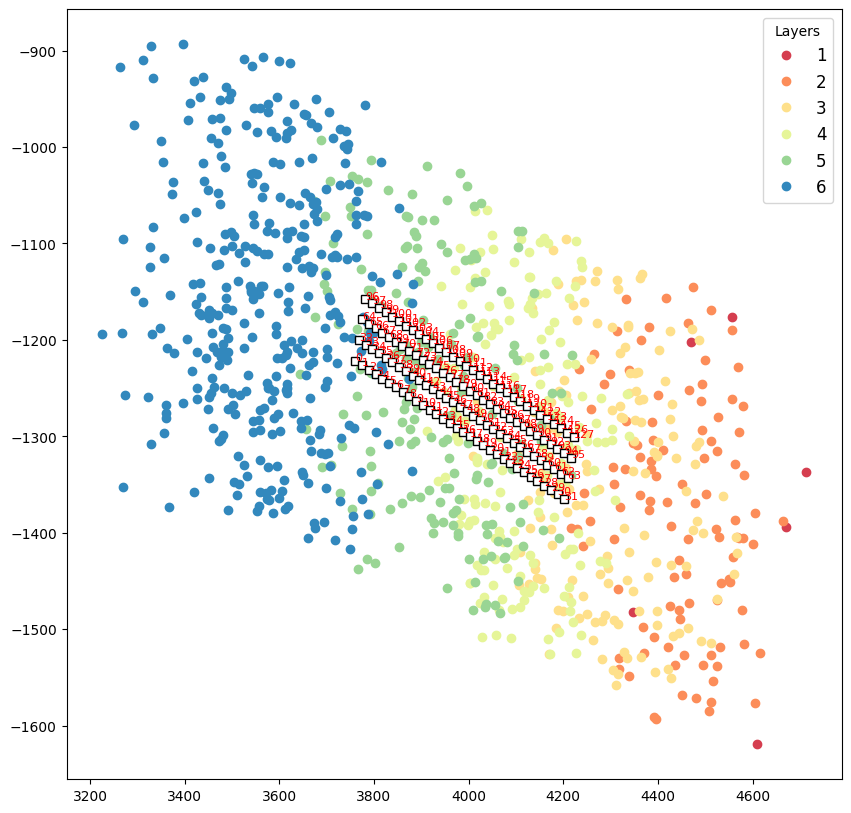

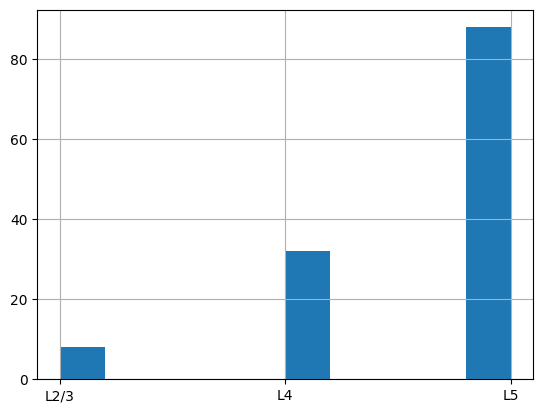

In [22]:
Recording_p2 = si.load_extractor(WIRED_PATH_P2)
Recording_p2.get_property("layers")

# 40 secs
# wire recording with probe
print("channel ids:\n", Recording_p2.get_channel_ids())

# contact ids are empty. In Kilosort3 they are ordered with the coordinates rows and assigned labels 1:384
# get contact coordinates
Probe2 = Recording_p2.get_probe()
print("contact ids:\n", Probe2.contact_ids)

# print contacts in cortex
print("\nSites in cortex:")
Probe2.contact_ids[Recording_p2.get_property("layers") != "Outside"]

# print sites per layer
print("\nSites by layer:")
print(
    "Sites in layer 1:", Probe2.contact_ids[Recording_p2.get_property("layers") == "L1"]
)
print(
    "Sites in layer 2:", Probe2.contact_ids[Recording_p2.get_property("layers") == "L2"]
)
print(
    "Sites in layer 3:", Probe2.contact_ids[Recording_p2.get_property("layers") == "L3"]
)
print(
    "Sites in layer 4:", Probe2.contact_ids[Recording_p2.get_property("layers") == "L4"]
)
print(
    "Sites in layer 5:", Probe2.contact_ids[Recording_p2.get_property("layers") == "L5"]
)
print(
    "Sites in layer 6:", Probe2.contact_ids[Recording_p2.get_property("layers") == "L6"]
)


# PLOT ----

# get the campaign parameters from the first simulation
simulation = load_campaign_params(data_conf_p2)

# get column circuit soma coord.
microcircuit = filter_microcircuit_cells(simulation)

microcircuit_coord = microcircuit["soma_location"].sample(
    n=1000, axis=0, random_state=1
)

# get cell layers
cell_layers = simulation["circuit"].cells.get(
    group=microcircuit["gid"], properties="layer"
)

# plot cells colored by layer
layer_color = [
    (0, 0, 0),
    (213 / 255, 62 / 255, 79 / 255),
    (252 / 255, 141 / 255, 89 / 255),
    (254 / 255, 224 / 255, 139 / 255),
    (230 / 255, 245 / 255, 152 / 255),
    (153 / 255, 213 / 255, 148 / 255),
    (50 / 255, 136 / 255, 189 / 255),
]

layers = np.sort(cell_layers.unique())

fig, ax = plt.subplots(figsize=(10, 10))

for layer_i in layers:
    ax.plot(
        microcircuit_coord.x[cell_layers == layer_i],
        microcircuit_coord.y[cell_layers == layer_i],
        ".",
        color=layer_color[int(layer_i)],
        markersize=12,
    )

# add contacts
ax.plot(
    Probe2.contact_positions[:, 0],
    Probe2.contact_positions[:, 1],
    marker="s",
    markersize=6,
    color="w",
    markeredgecolor="black",
    linestyle="None",
)
legend = ax.legend(layers, fontsize=12, title="Layers")

# label sites
for ix in range(len(Probe2.contact_positions)):
    if ix % 1 == 0:
        ax.text(
            Probe2.contact_positions[ix, 0],
            Probe2.contact_positions[ix, 1],
            "%s" % (str(Probe2.contact_ids[ix])),
            size=8,
            zorder=100,
            color="r",
        )

# report layers covered
out = getAtlasInfo(data_conf_p2["dataeng"]["blueconfig"], Probe2.contact_positions)

# electrodes per site
# - merge layers 2 and 3
plt.figure()
location_2 = pd.Series(out[1]).sort_values()
location_2[location_2 == "L2"] = "L2/3"
location_2[location_2 == "L3"] = "L2/3"
location_2.hist()

# Counter({' L2/3': 60, ' L1': 36, ' Outside of the cortex': 32})
Counter(location_2)

### Probe 3

channel ids:
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127]
contact ids:
 ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43'
 '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57'
 '58' '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71'
 '72' '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85'
 '86' '87' '88' '89' '90'

/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/indexes/multi.py:643: DeprecationWarning: `cumproduct` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `cumprod` instead.
  codes = cartesian_product(codes)
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [


Counter({'L6': 76, 'Outside': 52})

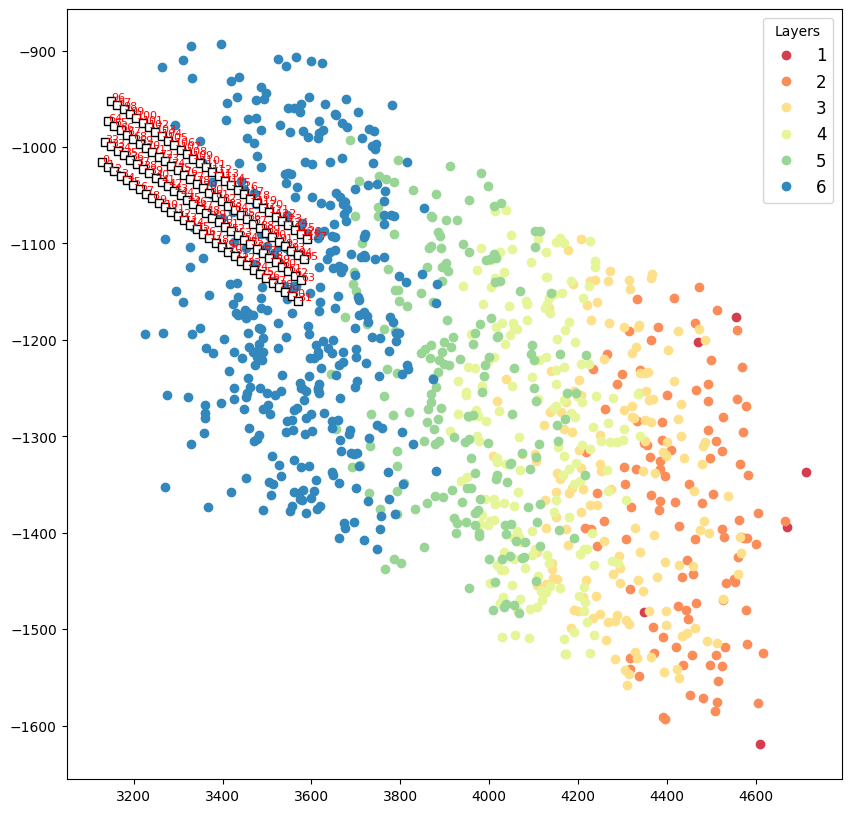

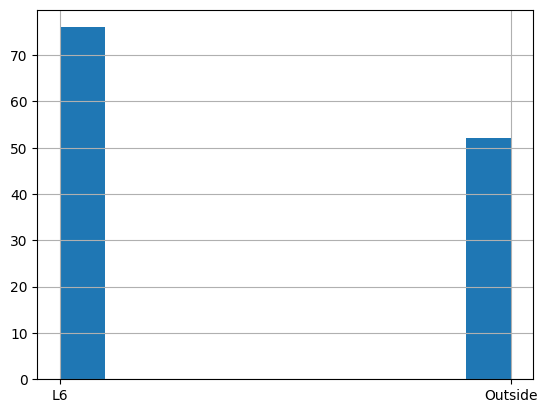

In [29]:
Recording_p3 = si.load_extractor(WIRED_PATH_P3)
Recording_p3.get_property("layers")

# 40 secs
# wire recording with probe
print("channel ids:\n", Recording_p3.get_channel_ids())

# contact ids are empty. In Kilosort3 they are ordered with the coordinates rows and assigned labels 1:384
# get contact coordinates
Probe3 = Recording_p3.get_probe()
print("contact ids:\n", Probe3.contact_ids)

# print contacts in cortex
print("\nSites in cortex:")
Probe3.contact_ids[Recording_p3.get_property("layers") != "Outside"]

# print sites per layer
print("\nSites by layer:")
print(
    "Sites in layer 1:", Probe3.contact_ids[Recording_p3.get_property("layers") == "L1"]
)
print(
    "Sites in layer 2:", Probe3.contact_ids[Recording_p3.get_property("layers") == "L2"]
)
print(
    "Sites in layer 3:", Probe3.contact_ids[Recording_p3.get_property("layers") == "L3"]
)
print(
    "Sites in layer 4:", Probe3.contact_ids[Recording_p3.get_property("layers") == "L4"]
)
print(
    "Sites in layer 5:", Probe3.contact_ids[Recording_p3.get_property("layers") == "L5"]
)
print(
    "Sites in layer 6:", Probe3.contact_ids[Recording_p3.get_property("layers") == "L6"]
)


# PLOT ----

# get the campaign parameters from the first simulation
simulation = load_campaign_params(data_conf_p3)

# get column circuit soma coord.
microcircuit = filter_microcircuit_cells(simulation)

microcircuit_coord = microcircuit["soma_location"].sample(
    n=1000, axis=0, random_state=1
)

# get cell layers
cell_layers = simulation["circuit"].cells.get(
    group=microcircuit["gid"], properties="layer"
)

# plot cells colored by layer
layer_color = [
    (0, 0, 0),
    (213 / 255, 62 / 255, 79 / 255),
    (252 / 255, 141 / 255, 89 / 255),
    (254 / 255, 224 / 255, 139 / 255),
    (230 / 255, 245 / 255, 152 / 255),
    (153 / 255, 213 / 255, 148 / 255),
    (50 / 255, 136 / 255, 189 / 255),
]

layers = np.sort(cell_layers.unique())

fig, ax = plt.subplots(figsize=(10, 10))

for layer_i in layers:
    ax.plot(
        microcircuit_coord.x[cell_layers == layer_i],
        microcircuit_coord.y[cell_layers == layer_i],
        ".",
        color=layer_color[int(layer_i)],
        markersize=12,
    )

# add contacts
ax.plot(
    Probe3.contact_positions[:, 0],
    Probe3.contact_positions[:, 1],
    marker="s",
    markersize=6,
    color="w",
    markeredgecolor="black",
    linestyle="None",
)
legend = ax.legend(layers, fontsize=12, title="Layers")

# label sites
for ix in range(len(Probe3.contact_positions)):
    if ix % 1 == 0:
        ax.text(
            Probe3.contact_positions[ix, 0],
            Probe3.contact_positions[ix, 1],
            "%s" % (str(Probe3.contact_ids[ix])),
            size=8,
            zorder=100,
            color="r",
        )

# report layers covered
out = getAtlasInfo(data_conf_p3["dataeng"]["blueconfig"], Probe3.contact_positions)

# electrodes per site
# - merge layers 2 and 3
plt.figure()
location_3 = pd.Series(out[1]).sort_values()
location_3[location_3 == "L2"] = "L2/3"
location_3[location_3 == "L3"] = "L2/3"
location_3.hist()

# Counter({' L2/3': 60, ' L1': 36, ' Outside of the cortex': 32})
Counter(location_3)

### Check probe overlap

Counter({'L5': 88, 'L4': 32, 'L2/3': 8})

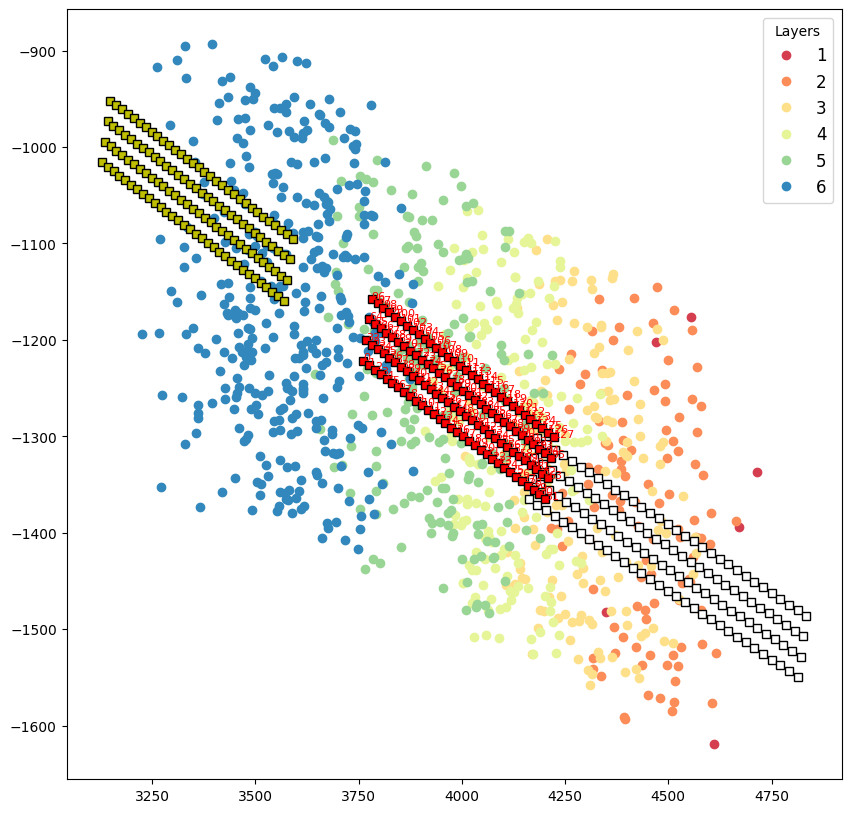

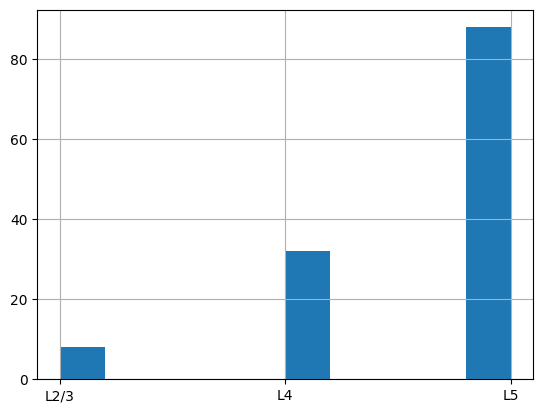

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))

for layer_i in layers:
    ax.plot(
        microcircuit_coord.x[cell_layers == layer_i],
        microcircuit_coord.y[cell_layers == layer_i],
        ".",
        color=layer_color[int(layer_i)],
        markersize=12,
    )

# add contacts
ax.plot(
    Probe1.contact_positions[:, 0],
    Probe1.contact_positions[:, 1],
    marker="s",
    markersize=6,
    color="w",
    markeredgecolor="black",
    linestyle="None",
)

# add contacts
ax.plot(
    Probe2.contact_positions[:, 0],
    Probe2.contact_positions[:, 1],
    marker="s",
    markersize=6,
    color="r",
    markeredgecolor="black",
    linestyle="None",
)

# add contacts
ax.plot(
    Probe3.contact_positions[:, 0],
    Probe3.contact_positions[:, 1],
    marker="s",
    markersize=6,
    color="y",
    markeredgecolor="black",
    linestyle="None",
)

legend = ax.legend(layers, fontsize=12, title="Layers")

# label sites
for ix in range(len(Probe2.contact_positions)):
    if ix % 1 == 0:
        ax.text(
            Probe2.contact_positions[ix, 0],
            Probe2.contact_positions[ix, 1],
            "%s" % (str(Probe2.contact_ids[ix])),
            size=8,
            zorder=100,
            color="r",
        )

# report layers covered
out = getAtlasInfo(data_conf_p2["dataeng"]["blueconfig"], Probe2.contact_positions)

# electrodes per site
# - merge layers 2 and 3
plt.figure()
location_2 = pd.Series(out[1]).sort_values()
location_2[location_2 == "L2"] = "L2/3"
location_2[location_2 == "L3"] = "L2/3"
location_2.hist()

# Counter({' L2/3': 60, ' L1': 36, ' Outside of the cortex': 32})
Counter(location_2)

### plot

In [ ]:
simulation = load_campaign_params(data_conf)
microcircuit = filter_microcircuit_cells(simulation)
microcircuit_coord = microcircuit["soma_location"].sample(
    n=1000, axis=0, random_state=1
)
cell_layers = simulation["circuit"].cells.get(
    group=microcircuit["gid"], properties="layer"
)
layers = np.sort(cell_layers.unique())
fig = plt.figure(figsize=(20, 20))

# setup plot
ax = fig.add_subplot(111, projection="3d")
ax.view_init(90, 0, 0)
layer_color = [
    (0, 0, 0),
    (213 / 255, 62 / 255, 79 / 255),
    (252 / 255, 141 / 255, 89 / 255),
    (254 / 255, 224 / 255, 139 / 255),
    (230 / 255, 245 / 255, 152 / 255),
    (153 / 255, 213 / 255, 148 / 255),
    (50 / 255, 136 / 255, 189 / 255),
]

for layer_i in layers:
    ax.plot(
        microcircuit_coord.x[cell_layers == layer_i],
        microcircuit_coord.y[cell_layers == layer_i],
        ".",
        color=layer_color[int(layer_i)],
        markersize=12,
    )

# add contacts
ax.plot(
    HorvathProbe1.contact_positions[:, 0],
    HorvathProbe1.contact_positions[:, 1],
    marker=".",
    markersize=12,
    color="y",
    markeredgecolor="black",
    linestyle="None",
)
legend = ax.legend(layers, fontsize=12, title="Layers")

In [ ]:
fig = plt.figure(figsize=(20, 20))

# setup plot
ax = fig.add_subplot(111, projection="3d")
ax.view_init(90, 0, 0)

for layer_i in layers:
    ax.plot(
        microcircuit_coord.x[cell_layers == layer_i],
        microcircuit_coord.y[cell_layers == layer_i],
        ".",
        color=layer_color[int(layer_i)],
        markersize=12,
    )

# add contacts
ax.plot(
    HorvathProbe2.contact_positions[:, 0],
    HorvathProbe2.contact_positions[:, 1],
    marker=".",
    markersize=12,
    color="y",
    markeredgecolor="black",
    linestyle="None",
)
legend = ax.legend(layers, fontsize=12, title="Layers")

In [ ]:
fig = plt.figure(figsize=(20, 20))

# setup plot
ax = fig.add_subplot(111, projection="3d")
ax.view_init(90, 0, 0)
for layer_i in layers:
    ax.plot(
        microcircuit_coord.x[cell_layers == layer_i],
        microcircuit_coord.y[cell_layers == layer_i],
        ".",
        color=layer_color[int(layer_i)],
        markersize=12,
    )

# add contacts
ax.plot(
    HorvathProbe3.contact_positions[:, 0],
    HorvathProbe3.contact_positions[:, 1],
    marker=".",
    markersize=12,
    color="y",
    markeredgecolor="black",
    linestyle="None",
)
legend = ax.legend(layers, fontsize=12, title="Layers")

# references 

https://bbpgitlab.epfl.ch/conn/personal/tharayil/eeg-for-neurodamus/-/blob/master/parallel/testNew/writeH5_MPI_prelim_reyespuerta.py